### **<ins>Libraries can be used</ins>**

- Pandas
- Scikit-Learn
- Feature Engine
- NLTK

 ### **<ins> Numerical Variables </ins>**
 
### **1. Check for Extreme Values**

### **2. Check for Missing Values**

### **3. Mathematical Operations**

#### **Combining Features**
- Aggregation(sum, max, min, mean, mean)
- Relativity(ratios, differences)
- Decision Trees
- Polynomial Features
 
#### **Functions**

- Log
- Square Root
- Reciprocal
- Exponential

#### **Transformations**

- Power
- Box-Cox
- Yeo-Johnson

### **4. Feature Scaling Techniques** 

- Standardization
- Normalization
- Median and IQR

### **<ins> Categorical Variables </ins>** 

#### **1. Handling Missing Values**

 Replace with
 - Most Frequent
 - Arbitrary
 - Mean
 
#### **2. Manipulating Categories**

 - Group the rare categories
 - Replace related categories with relevant and logical values
 - Convert to binary category for Conviction

#### **3. Encoding Techniques**
 
 Types
 - Ordinal
 - One Hot
 - Rare Label
 - Frequency
 - Mean of Target
 
 ### **<ins> DateTime Variables </ins>** 
 
 #### **1. Extracting Features from Dates**
  - Day
  - Month
  - Year
  - Quarter
  - Weekday
  - Day of the Week
  - Day of the year

 #### **2. Extracting Features from Timestamps****
  - Hour
  - Minute
  - Second

### **<ins>Text Variables</ins>**

#### **1. Aggregation**

- Frequency of characters
- Frequency of words
- Frequency of unique words

#### **2. Ratios**

- Take ratios from above created features


In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

In [2]:
sk.set_config(transform_output='pandas')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
tr = pd.read_csv('data/tr.csv')
tr.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-24,Kolkata,Banglore,20:20:00,22:55:00,155,0,No Info,4804
1,Air India,2019-06-01,Delhi,Cochin,05:15:00,07:40:00,1585,3,No Info,12383
2,Jet Airways,2019-06-27,Delhi,Cochin,23:05:00,12:35:00,810,2,In-flight meal not included,11150
3,Jet Airways,2019-05-21,Kolkata,Banglore,20:25:00,14:25:00,1080,1,No Info,11467
4,Vistara,2019-05-15,Banglore,Delhi,19:30:00,22:15:00,165,0,No Info,4878


In [5]:
X_tr = tr.drop(columns='price')
y_tr = tr.price

### Tranform Operations

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from feature_engine.encoding import RareLabelEncoder, MeanEncoder, CountFrequencyEncoder
from feature_engine.datetime import DatetimeFeatures
from feature_engine.outliers import Winsorizer
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer, FunctionTransformer

In [7]:
X_tr.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info'],
      dtype='object')

- **Airline**

In [8]:
X_tr.airline.isna().sum()

0

- There is no null value present in the airline column, so it need not to be imputed.

In [9]:
air_trans = Pipeline( steps = [
    ('Grouper', RareLabelEncoder(tol=0.07, replace_with='Others', n_categories=3)),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
        ] )
air_trans.fit_transform(X_tr.loc[:, ['airline']])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Others,airline_Spicejet
0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
1915,0.0,0.0,1.0,0.0,0.0,0.0
1916,0.0,1.0,0.0,0.0,0.0,0.0
1917,0.0,1.0,0.0,0.0,0.0,0.0
1918,1.0,0.0,0.0,0.0,0.0,0.0


- **date of journey**

In [10]:
feature_to_ext = ['month', 'week', 'day_of_week','day_of_month', 'day_of_year']
doj_trans = Pipeline(steps=[
    ('dt', DatetimeFeatures(features_to_extract=feature_to_ext, yearfirst=True, format='mixed')),
    ('scaler', MinMaxScaler())
])

doj_trans.fit_transform(X_tr.loc[:, ['date_of_journey']])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_month,date_of_journey_day_of_year
0,1.000000,1.000000,0.000000,0.884615,0.974576
1,1.000000,0.764706,0.833333,0.000000,0.779661
2,1.000000,1.000000,0.500000,1.000000,1.000000
3,0.666667,0.705882,0.166667,0.769231,0.686441
4,0.666667,0.647059,0.333333,0.538462,0.635593
...,...,...,...,...,...
1915,0.000000,0.058824,0.333333,0.192308,0.042373
1916,1.000000,0.823529,0.500000,0.192308,0.822034
1917,0.333333,0.294118,0.833333,0.192308,0.305085
1918,1.000000,0.882353,0.833333,0.538462,0.898305


In [11]:
loc = X_tr.loc[:, ['source', 'destination']]
loc

,source,destination
0,Kolkata,Banglore
1,Delhi,Cochin
2,Delhi,Cochin
3,Kolkata,Banglore
4,Banglore,Delhi
...,...,...
1915,Delhi,Cochin
1916,Delhi,Cochin
1917,Kolkata,Banglore
1918,Delhi,Cochin


In [12]:
loc_pipe1 = Pipeline( steps = [
    ('Grouper', RareLabelEncoder(tol=0.08, replace_with='Others', n_categories=3)),
     ('Meanencoder', MeanEncoder()), ('Transformer', PowerTransformer())
        ] )
loc_pipe1.fit_transform(loc, y_tr)

,source,destination
0,-0.055648,-0.202656
1,1.027611,0.803422
2,1.027611,0.803422
3,-0.055648,-0.202656
4,-1.013992,-1.605500
...,...,...
1915,1.027611,0.803422
1916,1.027611,0.803422
1917,-0.055648,-0.202656
1918,1.027611,0.803422


- Creating a feature to cheque whether it is north city or not

In [13]:
np.union1d(X_tr.source.unique(),X_tr.destination.unique() )

array(['Banglore', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai', 'New Delhi'], dtype=object)

In [14]:
def is_north(X):
    cols = X.columns.to_list()
    north_reg = ['Delhi','Kolkata','New Delhi']
    return X.assign(**{
        f'{col}_is_in_north': X.loc[:,col].isin(north_reg).astype(int)
        for col in cols
    }).drop(columns=['source','destination'])

FunctionTransformer(func = is_north).fit_transform(loc)

,source_is_in_north,destination_is_in_north
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
1915,1,0
1916,1,0
1917,1,0
1918,1,0


In [15]:
is_north(loc)

,source_is_in_north,destination_is_in_north
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
1915,1,0
1916,1,0
1917,1,0
1918,1,0


In [16]:
loc_trans = FeatureUnion(transformer_list=[('part1', loc_pipe1),('part2',FunctionTransformer(is_north))])
loc_trans.fit_transform(loc, y_tr)

,source,destination,source_is_in_north,destination_is_in_north
0,-0.055648,-0.202656,1,0
1,1.027611,0.803422,1,0
2,1.027611,0.803422,1,0
3,-0.055648,-0.202656,1,0
4,-1.013992,-1.605500,0,1
...,...,...,...,...
1915,1.027611,0.803422,1,0
1916,1.027611,0.803422,1,0
1917,-0.055648,-0.202656,1,0
1918,1.027611,0.803422,1,0


- **Dep and Arrival time**

In [17]:
time=X_tr.loc[:, ['dep_time', 'arrival_time']]
time

,dep_time,arrival_time
0,20:20:00,22:55:00
1,05:15:00,07:40:00
2,23:05:00,12:35:00
3,20:25:00,14:25:00
4,19:30:00,22:15:00
...,...,...
1915,07:05:00,04:25:00
1916,18:35:00,01:30:00
1917,15:15:00,17:45:00
1918,05:00:00,07:40:00


In [18]:
time_pipe1 = Pipeline(steps=[
    ('dt', DatetimeFeatures(features_to_extract=['hour','minute'])), ('scaler', StandardScaler())
])
time_pipe1.fit_transform(time)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,1.315334,-0.235272,1.290415,1.818122
1,-1.285711,-0.501460,-0.909807,0.912833
2,1.835543,-1.033837,-0.176400,0.611070
3,1.315334,0.030917,0.116963,0.007544
4,1.141931,0.297105,1.290415,-0.595982
...,...,...,...,...
1915,-0.938905,-1.033837,-1.349851,0.007544
1916,0.968528,0.563294,-1.789896,0.309307
1917,0.448319,-0.501460,0.557008,1.214596
1918,-1.285711,-1.300026,-0.909807,0.912833


In [19]:
def daytime(X):
    cols=X.columns.to_list()
    x_temp = X.assign(**{
        col: pd.to_datetime(X.loc[:,col]).dt.hour
        for col in cols
    })
    return x_temp.assign(**{
        f'{col} daytime':np.select([x_temp.loc[:,col].between(5,12,inclusive='left'),
                                    x_temp.loc[:,col].between(12,16,inclusive='left'),
                                    x_temp.loc[:,col].between(16,20,inclusive='left'),
                                    x_temp.loc[:,col].between(20,23,inclusive='left')],
                                    ['morning','afternoon','evening','night'], default='midnight')
        for col in cols
    }).drop(columns=cols)

FunctionTransformer(func = daytime).fit_transform(time)

,dep_time daytime,arrival_time daytime
0,night,night
1,morning,morning
2,midnight,afternoon
3,night,afternoon
4,evening,night
...,...,...
1915,morning,midnight
1916,evening,midnight
1917,afternoon,evening
1918,morning,morning


In [20]:
time_pipe2 = Pipeline(steps=[
    ('daytime', FunctionTransformer(func = daytime)), ('encoder', CountFrequencyEncoder()),
    ('scaler', StandardScaler())
])

time_pipe2.fit_transform(time)

,dep_time daytime,arrival_time daytime
0,-0.941511,-1.389231
1,1.072039,0.770807
2,-1.504070,-1.423248
3,-0.941511,-1.423248
4,-0.567615,-1.389231
...,...,...
1915,1.072039,0.277570
1916,-0.567615,0.277570
1917,-1.034128,0.940889
1918,1.072039,0.770807


In [21]:
time_trans = FeatureUnion(transformer_list=[('part1', time_pipe1),('part2',time_pipe2)])
time_trans.fit_transform(time, y_tr)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time daytime,arrival_time daytime
0,1.315334,-0.235272,1.290415,1.818122,-0.941511,-1.389231
1,-1.285711,-0.501460,-0.909807,0.912833,1.072039,0.770807
2,1.835543,-1.033837,-0.176400,0.611070,-1.504070,-1.423248
3,1.315334,0.030917,0.116963,0.007544,-0.941511,-1.423248
4,1.141931,0.297105,1.290415,-0.595982,-0.567615,-1.389231
...,...,...,...,...,...,...
1915,-0.938905,-1.033837,-1.349851,0.007544,1.072039,0.277570
1916,0.968528,0.563294,-1.789896,0.309307,-0.567615,0.277570
1917,0.448319,-0.501460,0.557008,1.214596,-1.034128,0.940889
1918,-1.285711,-1.300026,-0.909807,0.912833,1.072039,0.770807


- **Duration**

In [26]:
X_tr.duration.quantile([0.25, 0.5, 0.75]).values.reshape(-1, 1)


array([[170.],
       [480.],
       [880.]])

In [28]:
dur = X_tr.loc[:, ['duration']]

In [34]:
dur_pipe1 = Pipeline(steps=[
    ('transformer', PowerTransformer()), ('scaler', StandardScaler())
])

# dur_pipe1.fit_transform(dur)
dur_pipe2 = Pipeline(steps=[
    ('outliers', Winsorizer(capping_method='iqr', fold=1.5) ), ('imputer', SimpleImputer(strategy='median'))])

dur_trans = FeatureUnion(transformer_list=[('part1', dur_pipe1),('part2', dur_pipe2)])
dur_trans.fit_transform(dur, y_tr)

,part1__duration,part2__duration
0,-1.100919,155.0
1,1.517763,1585.0
2,0.714252,810.0
3,1.053710,1080.0
4,-1.036397,165.0
...,...,...
1915,1.257608,1280.0
1916,-0.047325,415.0
1917,-1.134632,150.0
1918,1.529323,1600.0


- **Total stops**

In [38]:
def is_direct(X):
    return X.assign(is_direct_flight=X.total_stops.eq(0).astype(int))


tot_stops_trans = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),("direct flight", FunctionTransformer(func=is_direct))
])

tot_stops_trans.fit_transform(X_tr.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,0,1
1,3,0
2,2,0
3,1,0
4,0,1
...,...,...
1915,1,0
1916,1,0
1917,0,1
1918,2,0


- **Additional info**

In [49]:
X_tr.additional_info.unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Red-eye flight'],
      dtype=object)

In [44]:
info_pipe1 = Pipeline(steps=[
    ("group", RareLabelEncoder(tol=0.08, n_categories=3, replace_with="Others")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(X_tr.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Others
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1915,0.0,1.0,0.0
1916,0.0,1.0,0.0
1917,0.0,1.0,0.0
1918,0.0,1.0,0.0


In [52]:
def have_info(X):
    return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))

In [53]:
info_union = FeatureUnion(transformer_list=[
    ("part1", info_pipe1), ("part2", FunctionTransformer(func=have_info))
])

In [55]:
info_trans = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),("union", info_union)
])

info_trans.fit_transform(X_tr.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Others,additional_info
0,0.0,1.0,0.0,0
1,0.0,1.0,0.0,0
2,1.0,0.0,0.0,1
3,0.0,1.0,0.0,0
4,0.0,1.0,0.0,0
...,...,...,...,...
1915,0.0,1.0,0.0,0
1916,0.0,1.0,0.0,0
1917,0.0,1.0,0.0,0
1918,0.0,1.0,0.0,0


In [40]:
X_tr.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info'],
      dtype='object')

#### **This is the overall column transformer where we will put all the transformers together**

In [56]:
col_trans = ColumnTransformer(transformers=[
    ('air', air_trans, ['airline']), ('doj', doj_trans, ['date_of_journey'] ),
    ('location', loc_trans, ['source', 'destination']), ('time', time_trans, ['dep_time', 'arrival_time']),
    ('duration', dur_trans, ['duration']), ('total_stops',  tot_stops_trans, ['total_stops']),
    ('add_info', info_trans, ['additional_info'])
    ]) #  remainder='passthrough')

col_trans.fit_transform(X_tr, y_tr)

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Others,air__airline_Spicejet,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_month,...,time__dep_time daytime,time__arrival_time daytime,duration__part1__duration,duration__part2__duration,total_stops__total_stops,total_stops__is_direct_flight,add_info__additional_info_In-flight meal not included,add_info__additional_info_No Info,add_info__additional_info_Others,add_info__additional_info
0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.884615,...,-0.941511,-1.389231,-1.100919,155.0,0,1,0.0,1.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.764706,0.833333,0.000000,...,1.072039,0.770807,1.517763,1585.0,3,0,0.0,1.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,1.000000,0.500000,1.000000,...,-1.504070,-1.423248,0.714252,810.0,2,0,1.0,0.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.705882,0.166667,0.769231,...,-0.941511,-1.423248,1.053710,1080.0,1,0,0.0,1.0,0.0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,0.647059,0.333333,0.538462,...,-0.567615,-1.389231,-1.036397,165.0,0,1,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.058824,0.333333,0.192308,...,1.072039,0.277570,1.257608,1280.0,1,0,0.0,1.0,0.0,0
1916,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.823529,0.500000,0.192308,...,-0.567615,0.277570,-0.047325,415.0,1,0,0.0,1.0,0.0,0
1917,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.294118,0.833333,0.192308,...,-1.034128,0.940889,-1.134632,150.0,0,1,0.0,1.0,0.0,0
1918,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.882353,0.833333,0.538462,...,1.072039,0.770807,1.529323,1600.0,2,0,0.0,1.0,0.0,0


### **Feature Selection**

In [65]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(estimator=estimator,scoring="r2",threshold=0.08) 

### **Merging all together**

In [66]:
preprocessor = Pipeline(steps=[
    ("ct", col_trans),("selector", selector)
])

preprocessor.fit_transform(X_tr, y_tr)

,air__airline_Indigo,air__airline_Jet Airways,air__airline_Spicejet,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_in_north,duration__part1__duration,duration__part2__duration,total_stops__total_stops,total_stops__is_direct_flight
0,1.0,0.0,0.0,1.000000,0.974576,-0.055648,-0.202656,1,-1.100919,155.0,0,1
1,0.0,0.0,0.0,0.764706,0.779661,1.027611,0.803422,1,1.517763,1585.0,3,0
2,0.0,1.0,0.0,1.000000,1.000000,1.027611,0.803422,1,0.714252,810.0,2,0
3,0.0,1.0,0.0,0.705882,0.686441,-0.055648,-0.202656,1,1.053710,1080.0,1,0
4,0.0,0.0,0.0,0.647059,0.635593,-1.013992,-1.605500,0,-1.036397,165.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.0,1.0,0.0,0.058824,0.042373,1.027611,0.803422,1,1.257608,1280.0,1,0
1916,1.0,0.0,0.0,0.823529,0.822034,1.027611,0.803422,1,-0.047325,415.0,1,0
1917,1.0,0.0,0.0,0.294118,0.305085,-0.055648,-0.202656,1,-1.134632,150.0,0,1
1918,0.0,0.0,0.0,0.882353,0.898305,1.027611,0.803422,1,1.529323,1600.0,2,0


In [67]:
preprocessor

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('air',
                                                  Pipeline(steps=[('Grouper',
                                                                   RareLabelEncoder(n_categories=3,
                                                                                    replace_with='Others',
                                                                                    tol=0.07)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline']),
                                                 ('doj',
                                                  Pipeline(steps=[('dt',
                                                                   DatetimeFeatures(features_to_extract=['month',
                                                                                                         'week',
                                                                                                         'day_of_week',
                                                                                                         'day_of_month',...
                                                                                                                                     replace_with='Others',
                                                                                                                                     tol=0.08)),
                                                                                                                   ('encoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse_output=False))])),
                                                                                                  ('part2',
                                                                                                   FunctionTransformer(func=<function have_info at 0x000001E4FAF57F40>))]))]),
                                                  ['additional_info'])])),
                ('selector',
                 SelectBySingleFeaturePerformance(estimator=RandomForestRegressor(max_depth=3,
                                                                                  n_estimators=10,
                                                                                  random_state=42),
                                                  scoring='r2',
                                                  threshold=0.08))])

In [68]:
feature_perf = preprocessor.named_steps['selector'].feature_performance_
feature_perf

{'air__airline_Air India': -0.0003109573412963436,
 'air__airline_Indigo': 0.12451484493905973,
 'air__airline_Jet Airways': 0.18464270487955625,
 'air__airline_Multiple Carriers': 0.022928055697106136,
 'air__airline_Others': 0.026644581398055627,
 'air__airline_Spicejet': 0.08793281328207773,
 'doj__date_of_journey_month': 0.06558171176393839,
 'doj__date_of_journey_week': 0.1388022007179807,
 'doj__date_of_journey_day_of_week': 0.005026043478177848,
 'doj__date_of_journey_day_of_month': 0.025097857162215537,
 'doj__date_of_journey_day_of_year': 0.1661283930007262,
 'location__source': 0.14802166701480793,
 'location__destination': 0.23084580148027697,
 'location__source_is_in_north': 0.1139088050414359,
 'location__destination_is_in_north': 0.052147161281699606,
 'time__dep_time_hour': 0.004371550696873783,
 'time__dep_time_minute': 0.043065473467139403,
 'time__arrival_time_hour': 0.06813959567330741,
 'time__arrival_time_minute': 0.035671820362462525,
 'time__dep_time daytime': 0.

In [69]:
sorted_feat_imp = dict(sorted(feature_perf.items(), key=lambda val: val[1]))
sorted_feat_imp

{'add_info__additional_info_No Info': -0.003147992357852051,
 'add_info__additional_info': -0.003147992357852051,
 'air__airline_Air India': -0.0003109573412963436,
 'add_info__additional_info_In-flight meal not included': 0.000486534177272846,
 'time__dep_time_hour': 0.004371550696873783,
 'doj__date_of_journey_day_of_week': 0.005026043478177848,
 'time__dep_time daytime': 0.005191625165643125,
 'air__airline_Multiple Carriers': 0.022928055697106136,
 'doj__date_of_journey_day_of_month': 0.025097857162215537,
 'air__airline_Others': 0.026644581398055627,
 'time__arrival_time daytime': 0.030513636412291063,
 'add_info__additional_info_Others': 0.034581404946202064,
 'time__arrival_time_minute': 0.035671820362462525,
 'time__dep_time_minute': 0.043065473467139403,
 'location__destination_is_in_north': 0.052147161281699606,
 'doj__date_of_journey_month': 0.06558171176393839,
 'time__arrival_time_hour': 0.06813959567330741,
 'air__airline_Spicejet': 0.08793281328207773,
 'location__source

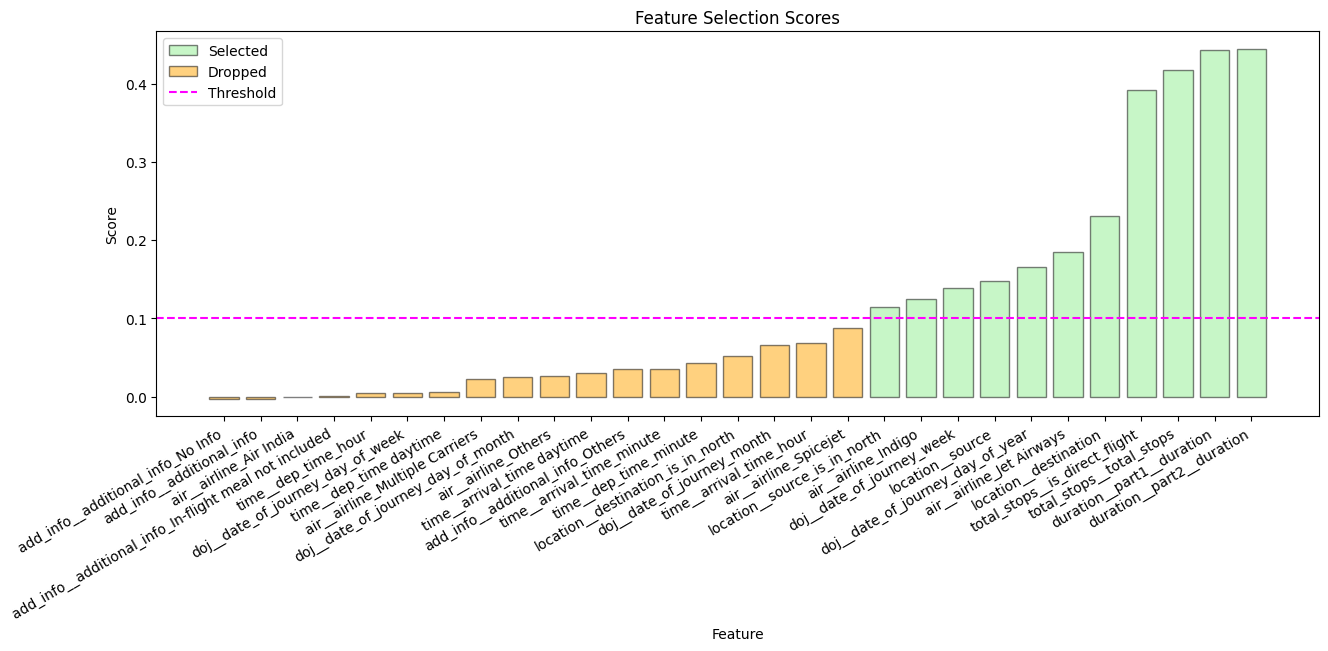

In [72]:
THRESHOLD = 0.1
import matplotlib.pyplot as plt
selected_bar = None
dropped_bar = None
colors = ["orange" if score < THRESHOLD else "lightgreen" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 5)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
    params = dict(x=i,height=score,edgecolor="black",alpha=0.5)
    if score < THRESHOLD:
        bar = ax.bar(color="orange",**params)
        if not dropped_bar:
            dropped_bar = bar[0]
    else:
        bar = ax.bar(color="lightgreen",**params)
        if not selected_bar:
            selected_bar = bar[0]

thresh_line = ax.axhline(y=0.1,color="magenta",linestyle="--")

ax.set_xticks(ticks=range(len(sorted_feat_imp)),labels=list(sorted_feat_imp.keys()),rotation=30,ha="right")

ax.set(xlabel="Feature",ylabel="Score",title="Feature Selection Scores")

ax.legend(handles=[selected_bar, dropped_bar, thresh_line],labels=["Selected", "Dropped", "Threshold"],loc="upper left")

plt.show()
